In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [37]:
with_mask=np.load('with_mumi_mask.npy')
without_mask=np.load('without_mumi_mask.npy')

In [38]:
with_mask.shape

(200, 50, 50, 3)

In [39]:
without_mask.shape

(200, 50, 50, 3)

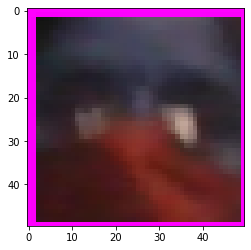

In [40]:
plt.imshow(with_mask[0])

In [41]:
with_mask=with_mask.reshape(200,50*50*3)
without_mask=without_mask.reshape(200,50*50*3)

In [42]:
X=np.r_[with_mask,without_mask]

In [43]:
X.shape

(400, 7500)

In [44]:
labels=np.zeros(X.shape[0])

In [45]:
labels[200:]=1.0

In [46]:
labels.shape

(400,)

In [47]:
names={0:'Mask',1:'No mask'}

In [48]:
labels[0]

0.0

In [49]:
labels[201]

1.0

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,labels,test_size=0.25)

In [52]:
x_train.shape

(300, 7500)

In [53]:
pca=PCA(n_components=3)
x_train=pca.fit_transform(x_train)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,labels,test_size=0.25)

In [54]:
x_train[0]

array([ 4082.39350027,  2394.42339226, -1321.55223554])

In [55]:
x_train.shape

(300, 3)

In [56]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [57]:
x_test=pca.transform(x_test)
y_pred=svm.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.41

In [59]:
haar_data=cv2.CascadeClassifier(r'C:\Users\tusha\OneDrive\Desktop\ml lab\data.xml')

In [60]:

capture =cv2.VideoCapture(0)
data =[]
font =cv2.FONT_HERSHEY_COMPLEX
while True:
    flag,img=capture. read( )
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255),4)
#             face = img[y:y+h,x:x+w,:]
            face = img[y:y+h, x:x+w, : ]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            face=pca.transform(face)
            pred = svm.predict(face)[0]
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244,250,250),2)
            print(n)
        cv2 . imshow( 'result' , img)
        #27 - ASCZZ o Fscape
        if cv2.waitKey(2) == 27:
            break

capture. release( )
cv2.destroyAllWindows( )



Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
